# <div align="center"> Classifying Songs Genres Using Neural Networks

## <div align="center"> by Allison Woodward

# 1 Introduction and Literature Review

## 1.1 Research Introduction and Literature Review

Previously covered in my project proposal, I examined potential trends in music audio features by analyzing data from songs that made the Billboard and ARIA charts from 1960-2023. While some clear trends across the years and decades emerged, giving way to the continuation of this project, I wanted to dive deeper into the additional ways we describe and quantify music. 

The dataset that I am using includes details about each track in addition to the numerical audio features (energy, valence, acousticness, tempo, etc.). For instance, every track includes information on artist name(s), album title, copyright information, record label, and more. What piqued my interest is that while every track includes data for artist genres, there is missing data in the column for album genres, and no data available at all for genre by song. While in some cases an artist’s general genres may be representative of their entire discography, many of the world’s leading artists have explored a variety of genres over the course of their career and may have songs that fit into entirely different genres as a byproduct. In light of this, I thought that an interesting continuation of this project would be exploring a way to analyze the audio from each track to assign genres to each individual song. The aim of my project is to create a new dataset that includes a column, "song genres," that lists the top genres of each particular song by using a pretrained machine learning model to classify songs based on a sample of their audio. Futher, I want to organize this dataframe in a way that makes accessing genre information more accessible and useful for future projects that are looking into genre based trends and insights.

A sudy conducted in 2019 by Chillara et al. [1] looked at using a variety of machine learning models for classifying music genres. The dataset that they used had pre-set genres for each song so that they were able to evaluate the accuary in which each model could predict correct genres. What they found is that "the best performance in terms of accuracy is observed for the CNN model that uses only the spectrogram as an input to predict the music genre with a test accuracy of 88.54%" [1]. In comparison, they found that feature based models were not able to predict genres as well with their logistic regression model only reaching an accuary of about 61%. This studies findings are backed up by another research paper conducted by Bahuleyan [2] which also found that the best model for music genre classification was spectogram based convolutional neural networks. These studies provide a strong case for just how useful machine learning, and particularly convolutional neural networks, can be in music genre classification.

## 1.2 Aims and Objectives

Spotify provides one of music streaming's most user friendly API's and as a byproduct, many of today's music datasets are comprised of data extracted from spotify. While this is extremely beneficial for working with large and specific sets of music data like the one I will be using, it is unfortunate that currently, the only genre data that you can pull from Spotify is based on general artist genres instead of more specific song based genres. In this project my aims are the following:

1. Clean the data in order to prepare a suitible and comprehensive dataset for genre classification
2. Revisit more specific trends in audio features as a continued exploration of the dataset
3. Use the pre-trained deep net, YAMNet, to classify music genres based on each individual song
4. Clean the YAMNet generated data so that it is in suitable condition for convenient and applicable future use
5. Analyse the generated song generes in comparison to the previously given artist genres

# 2 Data Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score

%matplotlib inline

df = pd.read_csv("top_10000_1960-now.csv")

In [2]:
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


## 2.1 Dropping Duplicates and Missing Values

In my first run through of cleaning, I will handle missing data that will cause obvious issues in my future analysis of the dataset. The dataset does contain some duplicate data points which may be due to the fact that some songs appeared on both Billboard and ARIA charts or remained on the charts for multiple years. These duplicates will be dropped in order to from a set of data that is most representative of popular music as a whole. Additionally, I will be dropping rows that are missing data for loudness, artist name(s), track name, album release date, time signature, and artist genres. Any data that is missing one of these points will not be helpful in my further research. Particularly if a track is missing the artist genres, it will not serve any purpose in the rest of the project as I look futher into the way that machine learning can classify song genres in comparison to the way Spotify classifies artist genres

In [3]:
#drops all duplicated that are exact copies
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [4]:
df.dropna(subset = ['Loudness', 'Artist Name(s)', 'Track Name', 'Album Release Date', 'Time Signature', 'Artist Genres'], inplace=True)

In [5]:
df.drop(columns = ['Album Genres'], inplace=True)

In [7]:
df.shape

(9402, 34)

In this initial round of basic cleaning, about 600 data points were dropped. Luckily, this number is not too large in comparison to the 9,402 data points that remain. In the next phase of cleaning I will look into the data surrounding a particular artist as a subset of the entirety of the data. I have chosen to look into any song in the dataset that is by Taylor Swift because of the fact that she has the highest number of total songs in the data set and I am well versed on her discography to begin with. 

## 2.2 Sanity Checking a Subset of Data

In [8]:
#Looking into a smaller subet of data to check for data sanity
#let's look into taylor swift songs only

taylorSongs = df[df['Artist Name(s)'] == 'Taylor Swift']
taylorSongs

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights
179,spotify:track:43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:1NAmidJlEaVgA3MpcPFYGq,Lover,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2019-08-23,https://i.scdn.co/image/ab67616d0000b273e787cf...,...,1.0,0.5190,0.298000,0.000002,0.0812,0.5410,92.875,4.0,Taylor Swift,"C © 2019 Taylor Swift, P ℗ 2019 Taylor Swift"
245,spotify:track:25ay7ksy4YOD3FNOah0yoE,Welcome To New York,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:3GT1SFfrltwpfWM2FB7zV4,1989 (Deluxe),spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2014-10-27,https://i.scdn.co/image/ab67616d0000b273eb4ef6...,...,1.0,0.0323,0.034800,0.000002,0.3020,0.6580,116.992,4.0,Universal Music Group,"C © 2014 Big Machine Records, LLC, P ℗ 2014 Bi..."
360,spotify:track:6RRNNciQGZEXnqk8SQ9yv5,You Need To Calm Down,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:1NAmidJlEaVgA3MpcPFYGq,Lover,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2019-08-23,https://i.scdn.co/image/ab67616d0000b273e787cf...,...,1.0,0.0553,0.009290,0.000000,0.0637,0.7140,85.026,4.0,Taylor Swift,"C © 2019 Taylor Swift, P ℗ 2019 Taylor Swift"
828,spotify:track:6KEemo78n0RnCQWKkeOdXz,Eyes Open,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:6FeANe1ewmN6sY0VY0qfyI,The Hunger Games: Songs From District 12 And B...,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,2012-01-01,https://i.scdn.co/image/ab67616d0000b2739c351d...,...,1.0,0.0344,0.006670,0.001870,0.0839,0.2990,137.116,4.0,Universal Records,"C © 2012 Universal Republic Records, a divisio..."
1073,spotify:track:26eccs3bbw6DMekFwZbdL2,You Belong With Me,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:6mhqCOSN7y93aydjeBatWb,Fearless (Platinum Edition),spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2008-11-11,https://i.scdn.co/image/ab67616d0000b27323772e...,...,1.0,0.0384,0.164000,0.000025,0.1120,0.4450,129.964,4.0,Universal Music Group,"C © 2009 Big Machine Records, LLC, P ℗ 2009 Bi..."
1134,spotify:track:3Uo7WG0vmLQ07WB4BDwy7D,willow,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:5jmVg7rwRcgd6ARPAeYNSm,evermore,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2020-12-10,https://i.scdn.co/image/ab67616d0000b27325751b...,...,1.0,0.1640,0.835000,0.001790,0.1450,0.5490,80.961,4.0,Taylor Swift,"C © 2020 Taylor Swift, P ℗ 2020 Taylor Swift"
1148,spotify:track:4UKe8besA3ozapud4bAOug,Mine,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:7tVkF12ZBdXlyBg76y2vsU,Speak Now,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2010-10-25,https://i.scdn.co/image/ab67616d0000b2734e1f1c...,...,1.0,0.0308,0.004610,0.000001,0.1010,0.6920,121.050,4.0,Universal Music Group,"C © 2010 Big Machine Records, LLC, P ℗ 2010 Bi..."
1324,spotify:track:3De1LyIjNUrzsBt4cTu0iv,Crazier,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:2vBF31kBRYg7sGXyrdPdz1,Hannah Montana The Movie,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,2009-01-01,https://i.scdn.co/image/ab67616d0000b2733f14c5...,...,1.0,0.0274,0.070700,0.000008,0.1190,0.2180,133.109,3.0,Universal Music Group,"C (C) 2009 Disney Enterprises Inc., P (P) 2009..."
1384,spotify:track:3pHkh7d0lzM2AldUtz2x37,The Archer,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:1NAmidJlEaVgA3MpcPFYGq,Lover,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2019-08-23,https://i.scdn.co/image/ab67616d0000b273e787cf...,...,1.0,0.0401,0.120000,0.005690,0.0663,0.1660,124.344,4.0,Taylor Swift,"C © 2019 Taylor Swift, P ℗ 2019 Taylor Swift"
1593,spotify:track:59HjlYCeBsxdI0fcm3zglw,Wildest Dreams,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:2QJmrSgbdM35R67eoGQo4j,1989,

There are a few noteable things happening in this subet of data. Scrolling through this dataframe of Taylor Swift songs, it can be seen that some songs are featured in the data frame more than once. While strict row duplicates have already been dropped from the data set, there are two reasons why we might still be seeing duplicate tracks. First, some songs are featured twice because they are included from different albums. It may be included from when it was released as a single in addition to when it was released as an entire album and made it into the top 100 both times. Secondly, there are some tracks that appear to have almost completely identical information (track name, artist, album, etc.) but contain different copyrights and record lables. Upon further inspection, searching both URIs take you to the exact same song/album on Spotify. Towards the bottom of the album it tells you how many released there were for the album, showing if multiple record lables have copyrights and releases on it and explaining why there are multiple data points for the exact same song. An example of this can be seen below in the data included for "Blank Space" by Taylor Swift.

In [9]:
blankSpace = df[df['Track Name'] == 'Blank Space']
blankSpace

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights
2389,spotify:track:1p80LdxRV74UKvL8gnD7ky,Blank Space,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:2QJmrSgbdM35R67eoGQo4j,1989,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2014-10-27,https://i.scdn.co/image/ab67616d0000b2739abdf1...,...,1.0,0.0644,0.085,0.000002,0.1300,0.583,96.006,4.0,"Big Machine Records, LLC","C © 2014 Apollo A-1 LLC, P ℗ 2014 Apollo A-1 LLC"
3900,spotify:track:580t2NTEMOuCHV1sN3uhyD,Blank Space,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:6w36pmMA5bxECalu5rxQAw,1989,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2014-10-27,https://i.scdn.co/image/ab67616d0000b27304986c...,...,1.0,0.0646,0.085,0.000002,0.1300,0.583,96.009,4.0,Universal Music Group,"C © 2014 Big Machine Records, LLC, P ℗ 2014 Bi..."
5255,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g,Blank Space,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,spotify:album:1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,2014-01-01,https://i.scdn.co/image/ab67616d0000b27352b2a3...,...,1.0,0.0540,0.103,0.000000,0.0913,0.570,95.997,4.0,"Big Machine Records, LLC","C © 2014 Apollo A-1 LLC, P ℗ 2014 Apollo A-1 LLC"


Both of the cases that I decribed above can be shown in this one instance. "Blank Space" is included twice with the label "Big Machine Records, LLC", one being the album "1989" and one being the album "1989 (Deluxe)", and once with the Label "Universal Music Group". For sake of representing trends as a whole as accurately as possible. I will be removing duplicate songs regardless of having diffrent albums or labels. This is because I will not be looking into the data surrounding record labels or album titles and having only one data point per song will remove noise and excess data that is only in regard to one song.

There are some slight differences in some of the metrics such as "Acousticness" and "instrumentalness" that are peculiar, however, I do not believe that they are large enough differences to matter and any version of that song's metrics will be able to represent the singular song. The only data value with a large enough difference to note are the popularity scores that are attached to the different versions of the song. The three popularity scores for the three versions of "Blank Space" are shown below.

In [10]:
blankSpace['Popularity']

2389    84
3900     0
5255    92
Name: Popularity, dtype: int64

The issue here is that two of the Popularity scores are very high while one is zero. In order to best account for this, I will only be keeping the data point for each song that contains the highest popularity score. In order to do this I will be sorting my dataframe by Popularity from highest to lowest and then dropping tracks that have matching song titles and artist names to account for cases like the same song but one with a featured artist.

In [11]:
df = df.sort_values(by=['Popularity'], ascending=False)
df = df.drop_duplicates(subset= ['Track Name', 'Artist Name(s)'], keep='first', inplace=False, ignore_index=False)
df.shape

(8364, 34)

In [12]:
newBlankSpace = df[df['Track Name'] == 'Blank Space']
newBlankSpace['Popularity']

5255    92
Name: Popularity, dtype: int64

Next, I am creating a new column in my dataframe "Release Year" that puts the release date data into date time format in order to be able to analyze trends by averages across years.

In [13]:
df['Release Year'] = pd.to_datetime(df['Album Release Date'], format='ISO8601').dt.year

In [15]:
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,Release Year
2428,spotify:track:3k79jB4aGmMDUQzEwa46Rz,vampire,spotify:artist:1McMsnEElThX1knmY4oliG,Olivia Rodrigo,spotify:album:5kqfR7EuGbyp8x27Pr1kY9,vampire,spotify:artist:1McMsnEElThX1knmY4oliG,Olivia Rodrigo,2023-06-30,https://i.scdn.co/image/ab67616d0000b2731e5e75...,...,0.0560,0.1690,0.000000,0.3110,0.322,137.827,4.0,Olivia Rodrigo PS,"C © 2023 Olivia Rodrigo, under exclusive licen...",2023
9077,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,spotify:artist:4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,spotify:album:5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,spotify:artist:4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,2023-02-24,https://i.scdn.co/image/ab67616d0000b27337c0b3...,...,0.0331,0.4350,0.000004,0.3470,0.726,120.018,4.0,WM Korea,C © 2023 ATTRAKT under exclusive license to Wa...,2023
213,spotify:track:0yLdNVWF3Srea0uzk55zFn,Flowers,spotify:artist:5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,spotify:album:7I0tjwFtxUwBC1vgyeMAax,Flowers,spotify:artist:5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,2023-01-13,https://i.scdn.co/image/ab67616d0000b273f42954...,...,0.0668,0.0632,0.000005,0.0322,0.646,117.999,4.0,Columbia,"P (P) 2023 Smiley Miley, Inc. under exclusive ...",2023
1586,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),"spotify:artist:0iEtIxbK0KxaSlF7G42ZOp, spotify...","Metro Boomin, The Weeknd, 21 Savage",spotify:album:7txGsnDSqVMoRl6RQ9XyZP,HEROES & VILLAINS,spotify:artist:0iEtIxbK0KxaSlF7G42ZOp,Metro Boomin,2022-12-02,https://i.scdn.co/image/ab67616d0000b27313e54d...,...,0.0484,0.4170,0.000000,0.0822,0.172,97.950,4.0,Republic Records,"C © 2022 Boominati Worldwide, LLC, under exclu...",2022
1224,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,spotify:artist:5Pwc4xIPtQLFEnJriah9YJ,OneRepublic,spotify:album:04PEOM6kIEeq9lRp1asNP2,I Ain’t Worried (Music From The Motion Picture...,spotify:artist:5Pwc4xIPtQLFEnJriah9YJ,OneRepublic,2022-05-13,https://i.scdn.co/image/ab67616d0000b273ec96e0...,...,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4.0,Interscope Records,"C © 2022 Paramount Pictures, P ℗ 2022 Mosley M...",2022


In [16]:
bins= [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023]
eraLabels =["1950's", "1960's", "1970's", "1980's", "1990's", "2000's", "2010's", "2020's"]
df["Era"] = pd.cut(df['Release Year'], bins=bins, labels=eraLabels)

## 2.3 Creating Year Based Data

In order to look at trends across years, I am creating a new dataframe that contains the yearly averages of the audio features from the original dataset. This new dataframe will allow me to create visual representations of the way that trends have changed as a whole over the years and better understand the shifts in particular audio features.

In [19]:
yearly_data = df.groupby('Release Year').agg({'Release Year' : 'mean', 'Danceability': 'mean', 'Energy': 'mean', 'Loudness': 'mean', 'Speechiness': 'mean', 'Acousticness': 'mean', 'Instrumentalness': 'mean', 'Key': 'mean', 'Liveness': 'mean', 'Valence': 'mean', 'Tempo': 'mean','Track Name': 'count', 'Popularity': 'mean'})
yearly_data = yearly_data.rename(columns={"Danceability": "Average Danceability", "Energy": "Average Energy", "Loudness": "Average Loudness", "Speechiness": "Average Speechiness", "Acousticness": "Average Acousticness", "Instrumentalness": "Average Instrumentalness", "Key": "Average Key", "Liveness": "Average Liveness", "Valence": "Average Valence", "Tempo": "Average Tempo", "Popularity": "Average Popularity", "Track Name": "Track Count"})
yearly_data.head()

,Release Year,Average Danceability,Average Energy,Average Loudness,Average Speechiness,Average Acousticness,Average Instrumentalness,Average Key,Average Liveness,Average Valence,Average Tempo,Track Count,Average Popularity
Release Year,,,,,,,,,,,,,
1956,1956.0,0.557000,0.660000,-7.706000,0.056000,0.654000,0.000002,2.000000,0.138000,0.962000,95.252000,1,68.000000
1958,1958.0,0.605091,0.578455,-9.219818,0.075073,0.634909,0.000510,3.636364,0.250291,0.822636,134.630636,11,58.545455
1959,1959.0,0.384000,0.331000,-10.589667,0.037033,0.717000,0.000279,3.333333,0.223500,0.425667,130.707000,3,47.333333
1960,1960.0,0.456500,0.487100,-10.559200,0.041250,0.639500,0.020089,6.300000,0.211200,0.609300,126.638900,10,27.500000
1961,1961.0,0.533182,0.605091,-9.334091,0.061209,0.534909,0.000528,5.727273,0.221627,0.757545,123.939455,11,38.181818


# 3 Visualizing Audio Feature Trends

Text(0, 0.5, 'Averages')

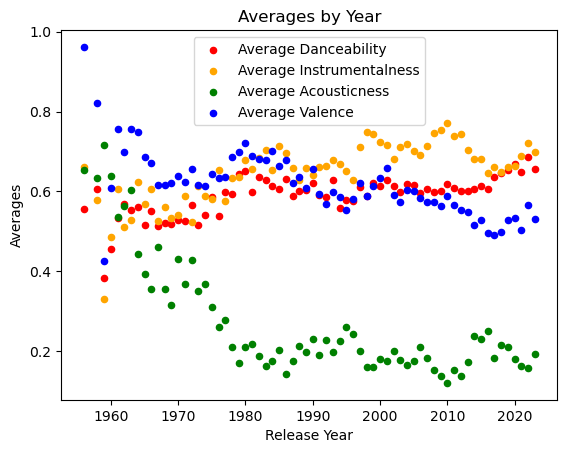

In [20]:

axis1 = yearly_data.plot(kind="scatter", rot=0, x = 'Release Year', y = 'Average Danceability', title = "Averages by Year", color = "red", label="Average Danceability")
axis2 = yearly_data.plot(kind='scatter', x='Release Year', y='Average Energy', color='orange', label="Average Instrumentalness", ax=axis1) 
axis3 = yearly_data.plot(kind='scatter', x='Release Year', y='Average Acousticness', color='green', label="Average Acousticness", ax=axis2) 
axis4 = yearly_data.plot(kind='scatter', x='Release Year', y='Average Valence', color='blue', label="Average Valence", ax=axis3) 


axis1.set_xlabel("Release Year")
axis1.set_ylabel("Averages")


Looking more closely into individual features, some clear trends emerge across the decades. The following plots, using the imported package linregress to plot the regression line, show the direction in which particular audio features have moved towards in the present day.

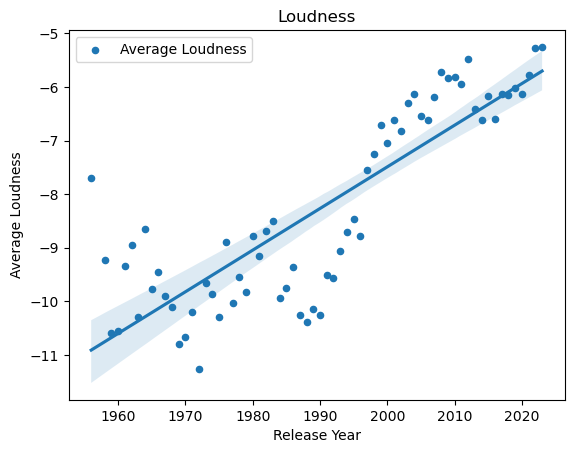

Slope: 0.07774582576943355


In [21]:
from scipy.stats import linregress

#graph for Loudness
loudnessGraph = yearly_data.plot(kind="scatter", rot=0, x = 'Release Year', y = 'Average Loudness', title = "Loudness", label="Average Loudness")

# Linear regression line
sns.regplot(x='Release Year', y='Average Loudness', data=yearly_data, scatter=False, ax=loudnessGraph)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Release Year'], yearly_data['Average Loudness'])

#slope
print(f"Slope: {slope}")

Loudness is the feature that most noteably shows a change in data over time. Even for those who are not musically trained to pick up on audio deatures within a song can listen to music from the 20th century and notice that they are significantly quieter than the songs from 2000 onward. While loudness has the greatest slope, the following graphs also show clear trends over the years.

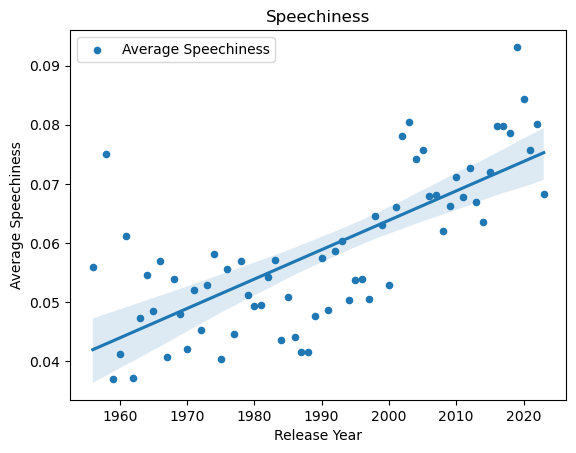

Slope: 0.0004967187397120268


In [22]:
speechiGraph = yearly_data.plot(kind="scatter", rot=0, x = 'Release Year', y = 'Average Speechiness', title = "Speechiness", label="Average Speechiness")

# Linear regression line
sns.regplot(x='Release Year', y='Average Speechiness', data=yearly_data, scatter=False, ax=speechiGraph)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Release Year'], yearly_data['Average Speechiness'])

#slope
print(f"Slope: {slope}")

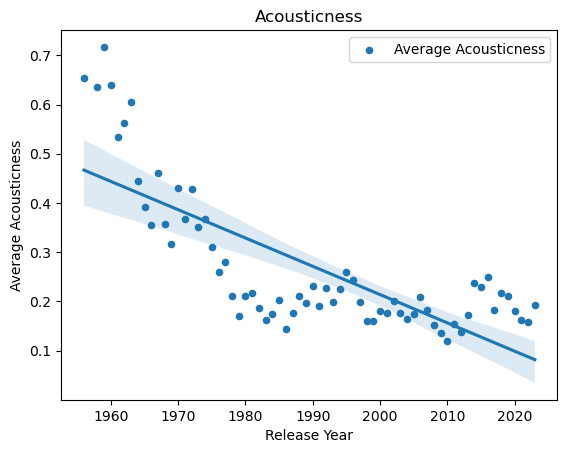

Slope: -0.005747596113351576


In [23]:
acousticnessGraph = yearly_data.plot(kind="scatter", rot=0, x = 'Release Year', y = 'Average Acousticness', title = "Acousticness", label="Average Acousticness")

# Linear regression line
sns.regplot(x='Release Year', y='Average Acousticness', data=yearly_data, scatter=False, ax=acousticnessGraph)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Release Year'], yearly_data['Average Acousticness'])

#slope
print(f"Slope: {slope}")

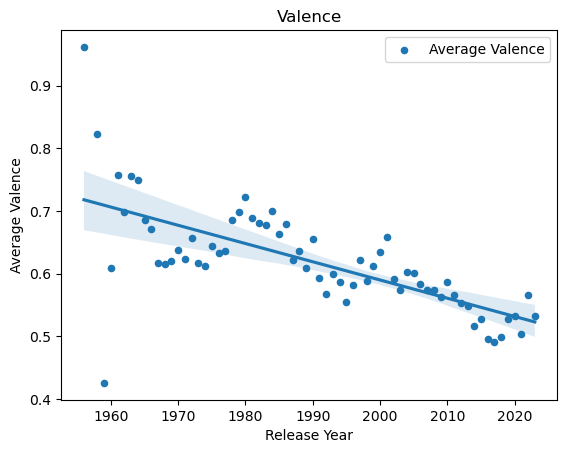

Slope: -0.0029110529991877025


In [24]:
valenceGraph = yearly_data.plot(kind="scatter", rot=0, x = 'Release Year', y = 'Average Valence', title = "Valence", label="Average Valence")

# Linear regression line
sns.regplot(x='Release Year', y='Average Valence', data=yearly_data, scatter=False, ax=valenceGraph)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Release Year'], yearly_data['Average Valence'])

#slope
print(f"Slope: {slope}")

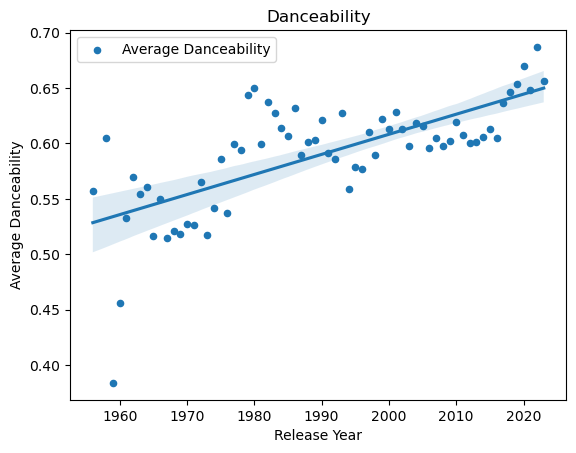

Slope: 0.0018117342289659009


In [25]:
danceGraph = yearly_data.plot(kind="scatter", rot=0, x = 'Release Year', y = 'Average Danceability', title = "Danceability", label="Average Danceability")

# Linear regression line
sns.regplot(x='Release Year', y='Average Danceability', data=yearly_data, scatter=False, ax=danceGraph)
plt.show()

# cite
slope, intercept, r_value, p_value, std_err = linregress(yearly_data['Release Year'], yearly_data['Average Danceability'])

#slope
print(f"Slope: {slope}")

# 4 YAMNet- Classifying Song Genres

In order to classify genres based on individual songs instead of entire artist discographies, I will be using YAMNet, "a pretrained deep net that predicts 521 audio event classes based on the AudioSet-YouTube corpus, and employing the Mobilenet_v1 depthwise-separable convolution architecture" [3]. This neural network analyzes audio clips and classifies the audio into 5 audio event classes that best fit. While these audio classes can range from speech to enviornmental noises, in the case of music it can classify instruments and genres.

The following are all of the imports utilized by YAMnet.

**YAMNet must be installed in order to run this section properly**

In [33]:
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt

import params as yamnet_params
import yamnet as yamnet_model
import tensorflow as tf

## 4.1 Preparation for running YAMNet

In my dataframe, each row contains a track URL that links to a 30 second preview of each song. Unfortunatley, quite a few data points are missing a Track URL which would take the dataset from around 9,400 rows to 6,212 rows. When deciding whether to take my own samples of each song in the dataframe or use the track URLs and lose the data with missing values, I decided to lose the approximate 3,000 values and focus on the data that does contain a track URL. This decision was founded on a few different lines of thought. While losing a third of the data is not ideal in any circumstance, with such a large sample size to begin with I am still left with a very substancial amount of data to work with. Now that I am no longer focusing on trends and only looking into genre classification, I do not have to worry as much about how this may scew yearly averages and trends across time. Additionally, the 30 second track URL clips included as a part of Spotify's data contains a "preview" portion of the song that is generally believed to be best representative of what you will get from the song as a whole. While I could choose a random chunk of each song to pull as data, without listening to each clip I run the risk of pulling a sound clip that is an inaccurate representation of what the rest of the song sounds like. Based on these considerations, I start by dropping the data points with missing track URLS and creating a new data frame to contain the classified song genres.

In [23]:
df.dropna(subset = ['Track Preview URL'], inplace=True)
songGenres = df[['Track Name', 'Artist Name(s)', 'Album Name', 'Popularity', 'ISRC', 'Artist Genres', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Track Preview URL']]

To begin to understand what this genre classification looks like I will be creating a sample dataframe that consists of ten randomly selected tracks from the original dataframe. This will give me a chance to begin veiwing what my output dataframe will look like as well as provide an example that can be run in a much shorter amount of time.

The process of downloading audio files and using YAMnet to classify the genres of all of the songs in the dataframe 'Song Genres' takes almost 7 hours. If trying to run this notebook, please be aware of this and use the sample set provided to see how the process is being handled instead.

In [865]:
songSamples = df[['Track Name', 'Artist Name(s)', 'Album Name', 'Popularity', 'ISRC', 'Artist Genres', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Track Preview URL']]
songSamples = songSamples.sample(n=10)
songSamples

,Track Name,Artist Name(s),Album Name,Popularity,ISRC,Artist Genres,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Preview URL
2357,Rabbit Heart (Raise It Up),Florence + The Machine,Lungs (Deluxe Version),59,GBUM70903474,"baroque pop,modern rock,uk alternative pop",0.625,0.858,-3.483,0.0462,0.09200,0.000001,0.2660,0.418,116.980,https://p.scdn.co/mp3-preview/6fa549dc958fbfa3...
7753,One Touch,"Jess Glynne, Jax Jones",Always in Between (Deluxe),61,GBAHS1900729,"pop,uk pop,dance pop,edm,house,pop dance,uk da...",0.686,0.693,-6.245,0.1310,0.32900,0.000000,0.1360,0.699,124.206,https://p.scdn.co/mp3-preview/a3b68dd67cb76d47...
5336,I'll Be There for You (Theme from Friends) - S...,The Rembrandts,Greatest Hits,54,USEE10412479,pop rock,0.164,0.919,-5.834,0.1490,0.07070,0.000002,0.1580,0.662,190.182,https://p.scdn.co/mp3-preview/a166fc8ab26bde42...
400,How Long Will I Love You - Bonus Track,Ellie Goulding,Halcyon Days,59,GBUM71304067,"indietronica,metropopolis,pop,uk pop",0.512,0.304,-9.190,0.0318,0.29500,0.000622,0.1180,0.172,126.078,https://p.scdn.co/mp3-preview/3525385073b3d9ff...
150,Saving All My Love For You,Dami Im,Dami Im,36,AUBM01300571,"australian pop,australian talent show,talent show",0.334,0.557,-5.961,0.0496,0.15500,0.000002,0.1060,0.362,197.622,https://p.scdn.co/mp3-preview/35640da08e923665...
9644,Fit but You Know It,The Streets,A Grand Don't Come for Free,62,GBFFS0400018,"birmingham hip hop,uk garage",0.680,0.844,-1.729,0.2990,0.23000,0.000000,0.0305,0.895,172.302,https://p.scdn.co/mp3-preview/c96ff4d1881a8f7c...
772,Stir Fry,Migos,Culture II,36,USUM71714082,"atl hip hop,hip hop,rap,trap",0.811,0.835,-4.927,0.2690,0.00318,0.000000,0.2000,0.530,181.843,https://p.scdn.co/mp3-preview/10856be43e43ff89...
9475,drivers license,Olivia Rodrigo,drivers license,29,USUG12004749,pop,0.585,0.436,-8.761,0.0601,0.72100,0.000013,0.1050,0.132,143.874,https://p.scdn.co/mp3-preview/8265999e85ac5e27...
3154,Kentucky Rain,Elvis Presley,From Elvis in Memphis,60,USRC16903934,"rock-and-roll,rockabilly",0.411,0.374,-14.028,0.0282,0.42700,0.000010,0.1540,0.558,105.265,https://p.scdn.co/mp3-preview/f11b565696d70eda...
9074,Chicken Fried,Zac Brown Band,The Foundation,84,USAT20804178,"contemporary country,country,country road,mode...",0.566,0.713,-4.250,0.0418,0.64500,0.000000,0.1140,0.805,169.861,https://p.scdn.co/mp3-preview/88d6f7a1fa2c4714...


The following for-loop runs the process in which track URLs are downloaded into audio clips and then used by YAMnet to classify the genres of each song.

In [866]:
from urllib import request



count = 0

for index, row in songSamples.iterrows():

    #gets the URL string from the dataframe
    URL = songSamples.loc[index,'Track Preview URL']

    #retrieves the audio clip from the URL and saves it to the environment as 'audioclip.wav'
    response = request.urlretrieve(URL, 'audioclip.wav')

    #this line runs YAMnet and retrieves the top 5 classes that the audio clip was classified into
    output = !python inference.py audioclip.wav

    #lastly, the 5 audio classes are entered into a new column in the dataframe, 'Song Genres'
    songSamples.loc[index,'Song Genres'] = str(output)

The following in a sample dataframe that acts as a subset of the dataframe that will result when this process is run on the entire set of data.

In [873]:
songSamples[['Track Name', 'Artist Name(s)', 'Artist Genres','Song Genres']]

,Track Name,Artist Name(s),Artist Genres,Song Genres
2357,Rabbit Heart (Raise It Up),Florence + The Machine,"baroque pop,modern rock,uk alternative pop","['audioclip.wav :', ' Music : 0.821', '..."
7753,One Touch,"Jess Glynne, Jax Jones","pop,uk pop,dance pop,edm,house,pop dance,uk da...","['audioclip.wav :', ' Music : 0.887', '..."
5336,I'll Be There for You (Theme from Friends) - S...,The Rembrandts,pop rock,"['audioclip.wav :', ' Music : 0.914', '..."
400,How Long Will I Love You - Bonus Track,Ellie Goulding,"indietronica,metropopolis,pop,uk pop","['audioclip.wav :', ' Music : 0.870', '..."
150,Saving All My Love For You,Dami Im,"australian pop,australian talent show,talent show","['audioclip.wav :', ' Music : 0.741', '..."
9644,Fit but You Know It,The Streets,"birmingham hip hop,uk garage","['audioclip.wav :', ' Music : 0.928', '..."
772,Stir Fry,Migos,"atl hip hop,hip hop,rap,trap","['audioclip.wav :', ' Music : 0.884', '..."
9475,drivers license,Olivia Rodrigo,pop,"['audioclip.wav :', ' Music : 0.847', '..."
3154,Kentucky Rain,Elvis Presley,"rock-and-roll,rockabilly","['audioclip.wav :', ' Music : 0.746', '..."
9074,Chicken Fried,Zac Brown Band,"contemporary country,country,country road,mode...","['audioclip.wav :', ' Music : 0.960', '..."


We can then begin to look into how YAMnet has classified the audio clip in comparision to the Artist Genres provided for each row of data to begin to understand how they may differ.

In [886]:
for index, row in songSamples.iterrows():
    print(songSamples.loc[index,'Artist Genres'])
    print(songSamples.loc[index,'Song Genres'])
    print('\n')

baroque pop,modern rock,uk alternative pop
['audioclip.wav :', '  Music       : 0.821', '  Singing     : 0.047', '  Pop music   : 0.046', '  Jingle (music): 0.033', '  Christian music: 0.022']


pop,uk pop,dance pop,edm,house,pop dance,uk dance,uk pop
['audioclip.wav :', '  Music       : 0.887', '  Pop music   : 0.089', '  Music of Asia: 0.046', '  Disco       : 0.040', '  Exciting music: 0.032']


pop rock
['audioclip.wav :', '  Music       : 0.914', '  Psychedelic rock: 0.130', '  Rock music  : 0.124', '  Rock and roll: 0.058', '  Grunge      : 0.048']


indietronica,metropopolis,pop,uk pop
['audioclip.wav :', '  Music       : 0.870', '  Christmas music: 0.037', '  Background music: 0.029', '  Jingle bell : 0.027', '  Singing     : 0.021']


australian pop,australian talent show,talent show
['audioclip.wav :', '  Music       : 0.741', '  Pop music   : 0.081', '  Singing     : 0.064', '  Independent music: 0.028', '  Christian music: 0.023']


birmingham hip hop,uk garage
['audioclip.

The following block of code now runs YAMnet on the entire set of data in the dataframe songGenres. Again, this process will take around 7 hours to complete and the resulting dataframe has been converted below into a csv file so that this cell does not have to be run and completed to run the following parts of the notebook.

## 4.2 Running YAMNet on the data

In [29]:
# This loop uses yamnet to classify the genres of every song in the data frame based on their audio recording
# It took about 6 1/2 hours to run all the way through so instead of running this, a sample set is provided above to show how it works

from urllib import request



count = 0

for index, row in songGenres.iterrows():

    URL = songGenres.loc[index,'Track Preview URL']
    response = request.urlretrieve(URL, 'audioclip.wav')
  
    output = !python inference.py audioclip.wav
    songGenres.loc[index,'Song Genres'] = str(output)


Immediatley, the resulting dataframe is converted to a csv file and saved so that it may be used for the following analysis.

In [30]:
songGenres.to_csv('songGenres.csv')

In order to avoid any mixup that could result in the changing of the songGenres dataframe, a new dataframe is created, 'genreDF' that takes in the data from the newly created csv file. This is the dataframe that will be used for the reamainder of the project.

In [927]:
genreDF = pd.read_csv("songGenres.csv")

## 4.3 Cleaning up the data

In [928]:
genreDF.head()

,Unnamed: 0,Track Name,Artist Name(s),Album Name,Popularity,ISRC,Artist Genres,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Preview URL,Song Genres
0,2428,vampire,Olivia Rodrigo,vampire,98,USUG12304091,pop,0.511,0.532,-5.745,0.0560,0.1690,0.000000,0.3110,0.322,137.827,https://p.scdn.co/mp3-preview/f0e20e86946a0f01...,"['audioclip.wav :', ' Music : 0.880', '..."
1,9077,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,97,KSA012239181,k-pop girl group,0.783,0.592,-8.332,0.0331,0.4350,0.000004,0.3470,0.726,120.018,https://p.scdn.co/mp3-preview/af5c16d4c69be9b3...,"['audioclip.wav :', ' Music : 0.943', '..."
2,213,Flowers,Miley Cyrus,Flowers,96,USSM12209777,pop,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://p.scdn.co/mp3-preview/9fbe346e805ed219...,"['audioclip.wav :', ' Music : 0.913', '..."
3,1586,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",HEROES & VILLAINS,95,USUG12208791,"hip hop,rap,canadian contemporary r&b,canadian...",0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,https://p.scdn.co/mp3-preview/adc5d059e4ccc40b...,"['audioclip.wav :', ' Music : 0.895', '..."
4,1224,I Ain't Worried,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,95,USUM72206227,"piano rock,pop",0.704,0.797,-5.927,0.0475,0.0826,0.000745,0.0546,0.825,139.994,https://p.scdn.co/mp3-preview/20d702edf937db02...,"['audioclip.wav :', ' Music : 0.900', '..."


Taking a look at the resulting dataframe, it is exactly as expected in comparison to the sample set previosuly run. There is a column at the beginning of the dataframe that contains the previous indexes of each row that will not be useful in any way and can be dropped.

In [929]:
genreDF = genreDF.drop(['Unnamed: 0'], axis=1)

Now that the classifications have been accumulated for each song, the format in which they have been presented in not suitible for easy comprehension and some work needs to be done to get the data from artist genres and song genres into the same format. First I will turn artist genres into a list so that they are each read as seperate genere classifications. For clarity's sake, the list of artist genres will be put into a new column 'Artist Genre List'.

In [930]:
#turning the string of Artist Genres into a list

genreDF['Artist Genres'] = genreDF['Artist Genres'].astype("string")

for index, row in genreDF.iterrows():
    string = row['Artist Genres']
    string = string.split(',')
    #print(string[0])
    genreDF.at[index, 'Artist Genre List'] = string

In order to do the same for the song genres, the data that was provided by YAMnet will need to be turned into a string and cleaned up into a suitible format. For the sake of this project, the numerical data (on a scale of 0-1) that measures the amount of classification into each genre will be dropped. While in other projects this data may be useful, because I am only looking at the classified song genres in comparison to artist genres, these values will be removed from the strings.

In [931]:
#clean up strings that are in 'Song Genres'
for i, r in genreDF.iterrows():

    genre_string = r['Song Genres']
    
    #get rid of begining of string that includes the file name
    genre_string = genre_string[21:-1]

    genre_string = genre_string.replace("'", "").replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace(":","").replace(".","").replace("   ","").replace("  ", "")
    #genre_string = genre_string.replace("0",'')

    genreDF.at[i, 'Song Genres'] = genre_string.lower()

Now that the song genre data has been formatted into more readable strings, the string data will be converted into a list of genres and placed into a new column 'Song Genre List' that will parallel the data previously retrieved in the column 'Artist Genre List'.

In [932]:
#creating column for a list of song genres
genreDF['Song Genre List'] = None 


for i, r in genreDF.iterrows():
    
    string = r['Song Genres']

    genreList = string.split(',')

    glist = genreList[0:5]
    
    genreDF.at[i, 'Song Genre List'] = glist


The resulting dataframe with the additional columns, 'Artist Genre List' and 'Song Genre List' can be seen below.

In [933]:
genreDF.head()

,Track Name,Artist Name(s),Album Name,Popularity,ISRC,Artist Genres,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Preview URL,Song Genres,Artist Genre List,Song Genre List
0,vampire,Olivia Rodrigo,vampire,98,USUG12304091,pop,0.511,0.532,-5.745,0.0560,0.1690,0.000000,0.3110,0.322,137.827,https://p.scdn.co/mp3-preview/f0e20e86946a0f01...,"music,pop music ,music of asia ,singing,exciti...",pop,"[music, pop music , music of asia , singing, e..."
1,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,97,KSA012239181,k-pop girl group,0.783,0.592,-8.332,0.0331,0.4350,0.000004,0.3470,0.726,120.018,https://p.scdn.co/mp3-preview/af5c16d4c69be9b3...,"music,pop music ,christian music ,happy music,...",[k-pop girl group],"[music, pop music , christian music , happy mu..."
2,Flowers,Miley Cyrus,Flowers,96,USSM12209777,pop,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://p.scdn.co/mp3-preview/9fbe346e805ed219...,"music,pop music ,funk,disco,dance music",[pop],"[music, pop music , funk, disco, dance music]"
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",HEROES & VILLAINS,95,USUG12208791,"hip hop,rap,canadian contemporary r&b,canadian...",0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,https://p.scdn.co/mp3-preview/adc5d059e4ccc40b...,"music,rhythm and blues ,singing,soul music,pop...","[hip hop, rap, canadian contemporary r&b, cana...","[music, rhythm and blues , singing, soul music..."
4,I Ain't Worried,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,95,USUM72206227,"piano rock,pop",0.704,0.797,-5.927,0.0475,0.0826,0.000745,0.0546,0.825,139.994,https://p.scdn.co/mp3-preview/20d702edf937db02...,"music,pop music ,rhythm and blues ,disco,music...","[piano rock, pop]","[music, pop music , rhythm and blues , disco, ..."


Just by looking at a few rows of the dataframe, it is apparent that almost all, if not all, of the songs have the class 'music' as their top classification. While this makes sense that the top class match for these audio files would be music, this classification is not representative of any particular genre and should be dropped from the song genres list. Before doing so, I will check to see if all of the audio files have 'music' as one of their classes to ensure that this is the case across all of the data and not miss any interesting information that may have resulted if an audio file was not classified as music.

In [934]:
#check to see what indexes dont have music in their classification

for i, r in genreDF.iterrows():
    
    if 'music' not in genreDF.loc[i, 'Song Genre List']:
        print(i)

Now that it has been confirmed that all of the audio files were classified as music, 'music' will be dropped as a genre. Upon some further exploration, I identified that some of the songs obtained 'singing' as a classification. Because singing is also not representative of genre, any classification of singing will also be dropped from the genre lists.

In [935]:
for i, r in genreDF.iterrows():
    genreDF.loc[i, 'Song Genre List'].remove('music')
    if 'singing' in genreDF.loc[i, 'Song Genre List']:
        genreDF.loc[i, 'Song Genre List'].remove('singing')

The last bit of cleaning that can be done to obtain the final form of the dataframe is that the original 'Artist Genres' and 'Song Genres' columns can be removed, as the formats that the data is in will not be useful for anything, and the newly created genre lists can take their place.

In [936]:
genreDF['Artist Genres'] = genreDF['Artist Genre List']
genreDF['Song Genres'] = genreDF['Song Genre List']
genreDF = genreDF.drop(['Artist Genre List', 'Song Genre List'], axis = 1)

The result of this last bit of cleaning creates the dataframe containing song genres in its final form.

In [937]:
genreDF.head()

,Track Name,Artist Name(s),Album Name,Popularity,ISRC,Artist Genres,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Preview URL,Song Genres
0,vampire,Olivia Rodrigo,vampire,98,USUG12304091,pop,0.511,0.532,-5.745,0.0560,0.1690,0.000000,0.3110,0.322,137.827,https://p.scdn.co/mp3-preview/f0e20e86946a0f01...,"[pop music , music of asia , exciting music ]"
1,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,97,KSA012239181,[k-pop girl group],0.783,0.592,-8.332,0.0331,0.4350,0.000004,0.3470,0.726,120.018,https://p.scdn.co/mp3-preview/af5c16d4c69be9b3...,"[pop music , christian music , happy music]"
2,Flowers,Miley Cyrus,Flowers,96,USSM12209777,[pop],0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,https://p.scdn.co/mp3-preview/9fbe346e805ed219...,"[pop music , funk, disco, dance music]"
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",HEROES & VILLAINS,95,USUG12208791,"[hip hop, rap, canadian contemporary r&b, cana...",0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,https://p.scdn.co/mp3-preview/adc5d059e4ccc40b...,"[rhythm and blues , soul music, pop music ]"
4,I Ain't Worried,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,95,USUM72206227,"[piano rock, pop]",0.704,0.797,-5.927,0.0475,0.0826,0.000745,0.0546,0.825,139.994,https://p.scdn.co/mp3-preview/20d702edf937db02...,"[pop music , rhythm and blues , disco, music o..."


Finally, the completed data including genres by song is exported to a csv file.

In [1025]:
genreDF.to_csv('genre_final_data.csv')

# 5 Analyzing Song Genres vs. Artist Genres

## 5.1 Word Clouds

In order to better understand how YAMNet classified song genres in comparison to Spotify's artist genres, I will begin by creating word clouds as a visual representation of the genres that appeared in each classification. 

To begin this process, I will create two lists, one that combines all of the artist genre data and another for all of the song genre data.

In [938]:
artistGenreList = []
songGenreList = []
for i, r in genreDF.iterrows():
    artistGenreList += genreDF.loc[i, 'Artist Genres']
    songGenreList += genreDF.loc[i, 'Song Genres']

I will then be using the collections library in order to create dictionaries that count the number of occurences of each individual genre within each group.

In [940]:
from collections import Counter
descriptiveArtistGenres = Counter(artistGenreList)
descriptiveSongGenres = Counter(songGenreList)

Lastly, I will generate word clouds to represent genre trends within each group.

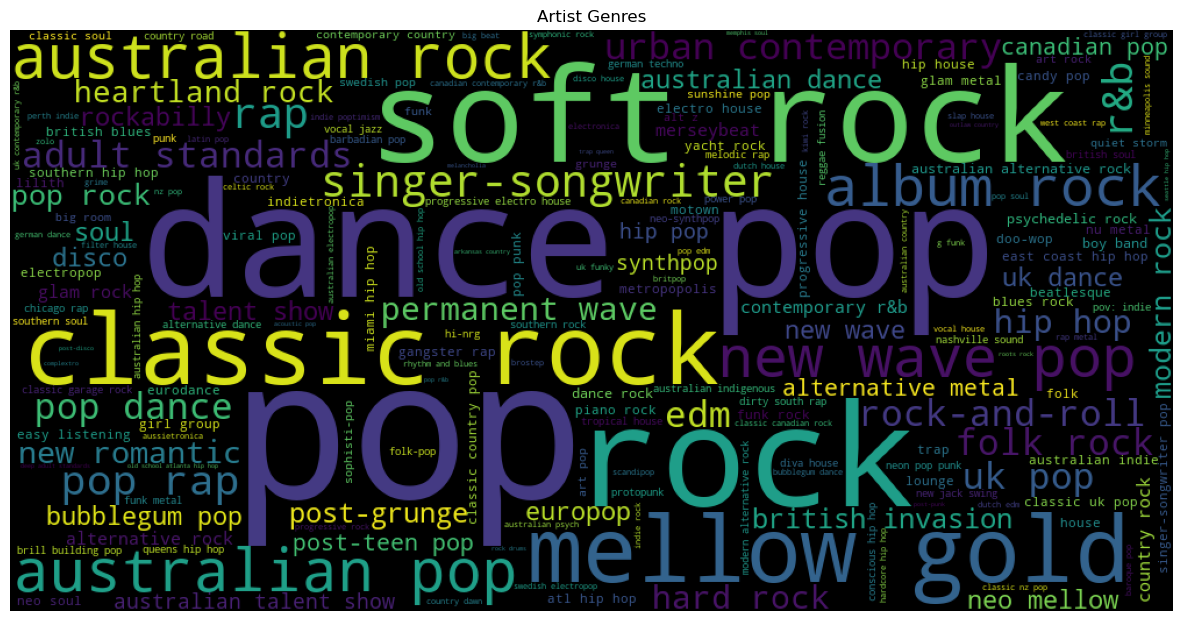

In [941]:
from wordcloud import WordCloud

word_could_dict=Counter(artistGenreList)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Artist Genres")
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

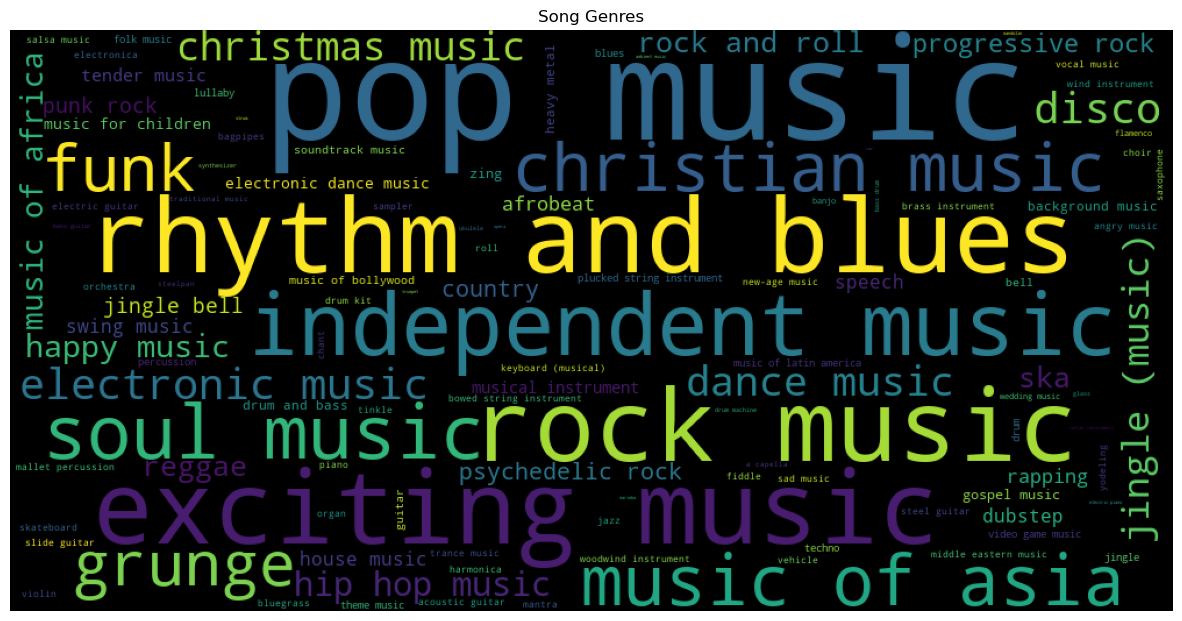

In [942]:
word_could_dict=Counter(songGenreList)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Song Genres")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

At a glance, some clear patterns emerge within these word clouds. Most notably pop music remains the most prominent genre within artist genres and song genres. In the artist genres world cloud dance pop is a close second, followed by a variety of rock sub-genres such as rock, soft rock, classic rock, and australian rock. In contrast, the secong biggest genre in song genres is rhythmn and blues, followed up by exciting music and rock music. Additionally, the song genres word cloud includes much more niche generes in comparison to the more generalized generes in the artist genres word cloud, which makes sense given the fact that artist genres are used to describe an artists music as a whole whereas song generes depict the genres included in a single song. 

## 5.2 Comparing Classifications

Lastly, to take another approach at understanding the song genres developed by YAMNet in comparison to the artist genres provided by Spotify, I want to look into how often YAMNet classified a song into the same class as an already existing artist genre for that track. While I believe that this is a good taking off point for further research and much more can be done to explore this, I want to employ a simple test to look at these correlations. In this test I want to look at two smaller subsets of the data by exploring only songs that have been classified as pop or rock either in artist genre, song genre, or both. Given that pop and rock are two of the largest genres in both word coulds, especially when considering all the sub-genres that fall under these categories, this gives me a look into a large portion of the data.

In this test, I am trying to see how much of the time tracks are classified as pop under both artist genre and song genre. Because there are so many subgenres of pop, for now I am classifying any genre that includes the word 'pop' as pop. 

In [1019]:
popTest = genreDF

correctPopCount = 0
incorrectPopCount = 0


for index, row in genreDF.iterrows():

    genreAlist = genreDF.loc[index, 'Artist Genres']
    genresAToString = ''.join(genreAlist)

    genreSlist = genreDF.loc[index, 'Song Genres']
    genresSToString = ''.join(genreSlist)

    #if pop is included in artist genres popArtist will be true
    if 'pop' in genresAToString:
        popArtist = True

    else:
        popArtist = False

    #if pop is included in song genres popSong will be true
    if 'pop' in genresSToString:
        popSong = True

    else:
        popSong = False

    #if the artist genre and song genre both include pop correct + 1
    if(popArtist and popSong):
        correctPopCount += 1
    #if song genre says pop but artist genre doesn't incorrect + 1
    if (popArtist == False) and (popSong == True):
        incorrectPopCount += 1
    #if artist genre says pop but song genre doesn't incorrect + 1
    if (popArtist == True) and (popSong == False):
        incorrectPopCount += 1


In [1020]:
totalPop = correctPopCount + incorrectPopCount

popPercentage = correctPopCount/totalPop

print("Percentage pop is classified the same:" , popPercentage)

Percentage pop is classified the same: 0.4989657549988508


According to this test, 49% of the time a track classified as pop was classified this way by both artist genres and song genres.

Running the same test on "rock" music:

In [1023]:
rockTest = genreDF


correctRockCount = 0
incorrectRockCount = 0


for index, row in genreDF.iterrows():
    
    genreAlist = genreDF.loc[index, 'Artist Genres']
    genresAToString = ''.join(genreAlist)

    genreSlist = genreDF.loc[index, 'Song Genres']
    genresSToString = ''.join(genreSlist)

    #if rock is included in artist genres rockArtist will be true
    if 'rock' in genresAToString:
        rockArtist = True

    else:
        rockArtist = False

    #if rock is included in song genres rockSong will be true
    if 'rock' in genresSToString:
        rockSong = True

    else:
        rockSong = False

    #if the artist genre and song genre both include rock correct + 1
    if(rockArtist and rockSong):
        correctRockCount += 1
        
    #if song genre says rock but artist genre doesn't incorrect + 1
    if (rockArtist == False) and (rockSong == True):
        incorrectRockCount += 1

    #if artist genre says rock but song genre doesn't incorrect + 1
    if (rockArtist == True) and (rockSong == False):
        incorrectRockCount += 1

In [1024]:
totalRock = correctRockCount + incorrectRockCount

rockPercentage = correctRockCount/totalRock

print("Percentage rock is classified the same:" , rockPercentage)

Percentage rock is classified the same: 0.36459802538787023


According to this test, 36% of the time a track classified as rock was classified this way by both artist genres and song genres.

While this test is interesting to get a better understanding about the differences between artist versus song genre classification, it is not indicative of the sucess of YAMNet's classifications. As discussed earlier in my report, artists genres can shift so much between songs that while an artist's main genre may be pop, they can also have songs more reflective of r&b or rap. Thought this test is not a mtric for measuring the success of genre classification by audio clips, it does give way to an interesting discussion on how much artist's shift genres in their music.

# 6 Conclusions

After looking further into the song genres generated by YAMNet and seeing consistent patterns of popular genres in comparison to artist genres, I feel that I have created a functional dataset that is representative of a large set of popular songs and their respective genres. When I originally set out to do a project surrounding popular music data, it would have been extremely useful to have readily accessible genre data that was relevant to specific songs to better analyze the way that genre trends have changed over time. Additionally, I believe that this newly formed dataset could be highly beneficial alongside use of clustering algorithms. Clustering based on audio features alone lacks substancial information that can only be obtained by the human ear or by use of machine learning to better understand the moods and intinations that create genres. I believe that categorizing songs based not only on numerical data but similarities in genres can ultimatley lead to more informed trend analysis moving forward.

The decision to use YAMNet founded on previous research studies that have proven convolutional neural networks to be the best at genre classification[1][2] allows me to believe that my informed choice of algorithm was successful in understanding some of the top genre matches for each song. The dataset that I have created marks a solid foundation for further research to evaluate how accuartely these genres represent the songs and how closely an artists signified genres correlate to the genres their songs generated using YAMNet.

Utilizing a pre-trained neural network has been a new experience for me and has taught me a lot in the process. More than anything I have learned just how important the data processing pipeline is to obtain a strong and useful data set that is in a format and data types that are readily usable for the desired outcomes.

# 7 Refrences and Resources

## 7.1 References

[1] Chillara, S., Kavitha, A. S., Neginhal, S. A., Haldia, S., & Vidyullatha, K. S. (2019). Music genre classification using machine learning algorithms: a comparison. Int Res J Eng Technol, 6(5), 851-858.

[2] Bahuleyan, Hareesh. (2018). Music Genre Classification using Machine Learning Techniques.

[3] https://github.com/tensorflow/models/tree/master/research/audioset/yamnet

[4] https://research.google.com/audioset/

## 7.2 Resources

- https://www.statology.org/line-of-best-fit-python/

- https://developer.spotify.com/documentation/web-api

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

- https://www.logilax.com/python-download-file-from-url/

- https://stackoverflow.com/questions/45588724/generating-word-cloud-for-items-in-a-list-in-python

- https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

- https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
